<h1>Experimental Works for Master's Project</h1>
* This consists of the analysis of motion capture data taken of FRDA patients and some controls
* The goal is to develop a new approach to the diagnosis and monitoring of FRDA
* This work focuses on binary classification of patients and healthy individuals in the clinical test

<h4>Importing some useful libraries </h4>
<p> </p>

In [1]:
import h5py #python library for working with HDF5 files
import pandas as pd  
import numpy as np
import GPy 
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing 
import pandas as pd

<h4> Defining plot function for 3D projections</h4>
<p></p>

In [2]:
def my3dplot(model):
    xs = model.X.mean.values[:,0]
    ys = model.X.mean.values[:,1]
    zs = model.X.mean.values[:,2]

    fig = plt.figure(figsize=(14, 14))
    ax = fig.add_subplot(121, projection='3d')
    xLabel = ax.set_xlabel('Latent Dimension 1', linespacing=3.2)
    yLabel = ax.set_ylabel('Latent Dimension 2', linespacing=3.2)
    zLabel = ax.set_zlabel('Latent Dimension 3', linespacing=3.2)
    ax.scatter3D(xs , ys , zs)

<h4>Importing, extrating and pre-processing data</h4>
<p><p/>

In [3]:
#Importing data
F = h5py.File('data8MW.mat')

#Extracting data
NewConts=F['Controls'] #controls datasets
ContD = {}
for i in range(len(NewConts[0][:])):
    st = NewConts[0][i]
    j = str(i)
    ContD['control' + j] = F[st][:]

#Preprocessing data
NewContD = {}
for i in range(len(ContD)):
    j = str(i)
    cont = pd.DataFrame(ContD['control' + j]).T
    std_scale = preprocessing.StandardScaler().fit(cont)
    cont = std_scale.transform(cont)
    NewContD['control' + j] = cont

In [4]:
NewPats=F['Patients'] #patients datasets
PatD = {}
for i in range(len(NewPats[0][:])):
    st = NewPats[0][i]
    j = str(i)
    PatD['patient' + j] = F[st][:]

#Preprocessing data
NewPatD = {}
for i in range(len(PatD)):
    j = str(i)
    pat = pd.DataFrame(PatD['patient' + j]).T
    std_scale = preprocessing.StandardScaler().fit(pat)
    pat = std_scale.transform(pat)
    NewPatD['patient' + j] = pat

<h4>Data Visualization using GP-LVM models</h4>
<p>
    <ul>
        <li> Visualization using GP-LVM without dynamics</li>
        <li> Visualization using MRD model, a sub-optimal alternative for GP-Dynamical Models</li>
    </ul>
</p>

<h5>Controls group</h5>

In [5]:
input_dim = 3 # How many latent dimensions to use
kern = GPy.kern.RBF(input_dim, lengthscale=40) + GPy.kern.Linear(input_dim,ARD=True) + GPy.kern.White(input_dim) 

 /home/mawulolo/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 /home/mawulolo/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


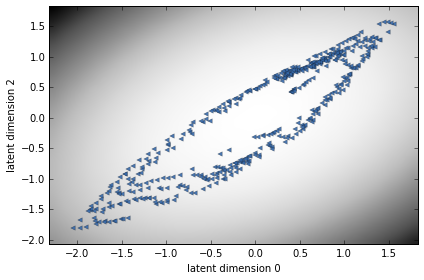

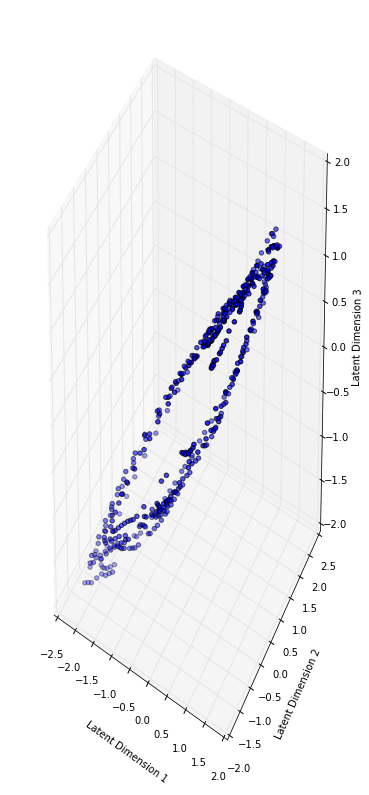

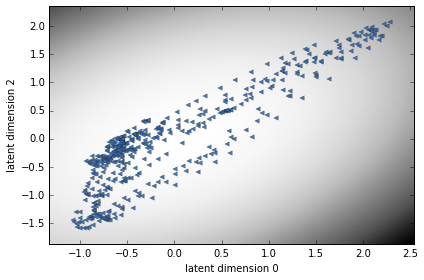

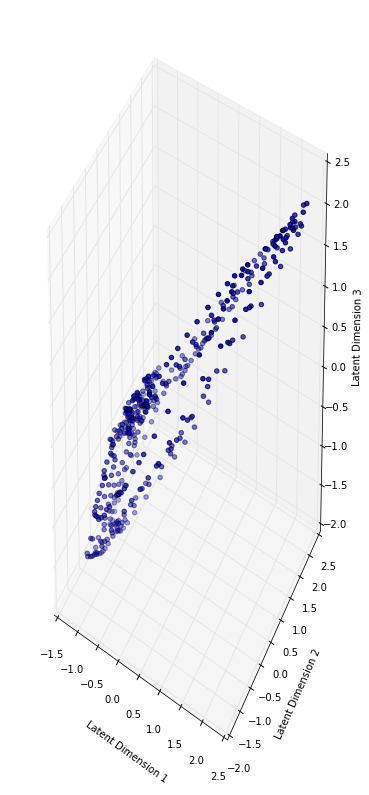

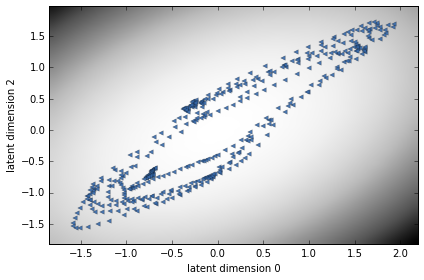

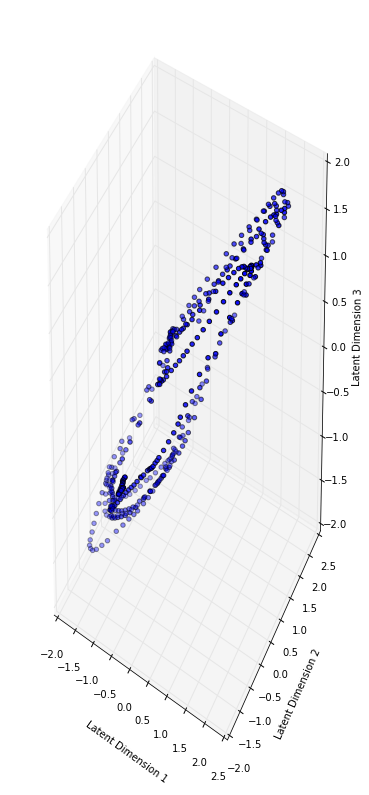

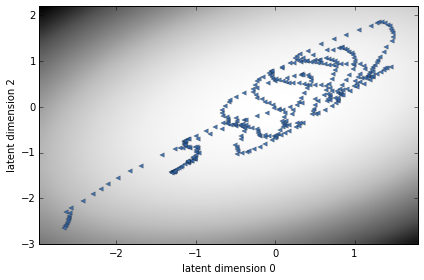

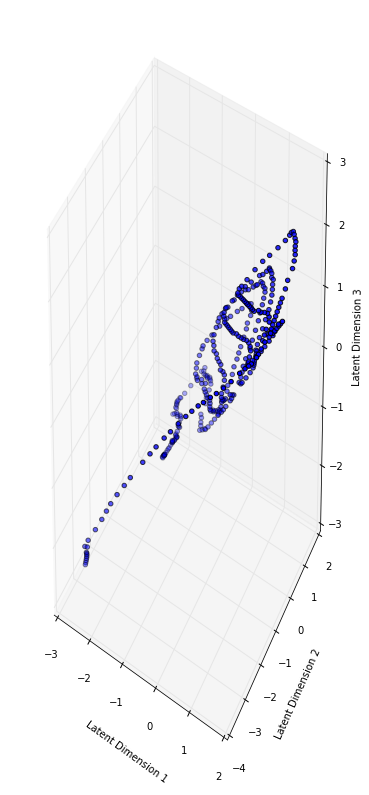

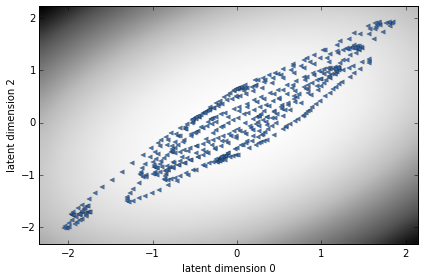

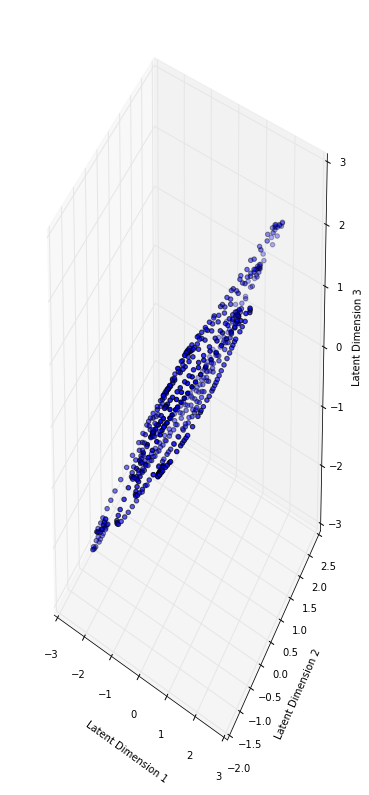

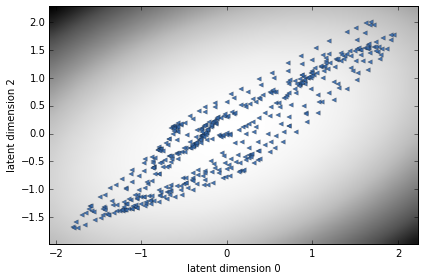

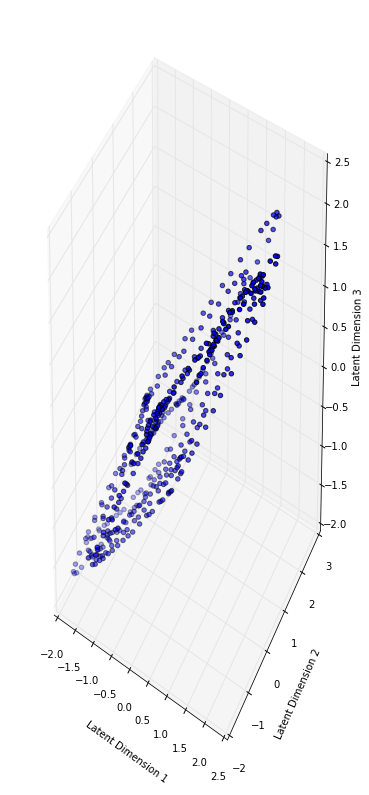

In [6]:
for k in range(len(ContD)):
    j = str(k)
    cont = NewContD['control' + j]
    model = GPy.models.BayesianGPLVM(cont, input_dim= input_dim, kernel=kern, num_inducing=25)
    model.optimize(messages = True)
    model.plot_latent() #2d projection
    my3dplot(model)

<h5>With Dynamics</h5>

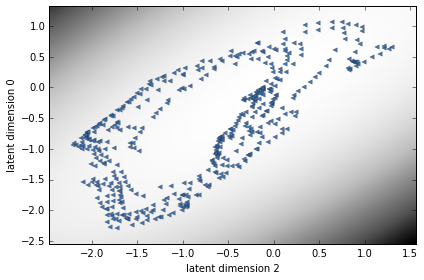

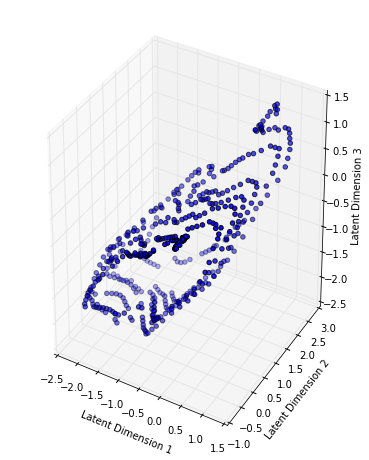

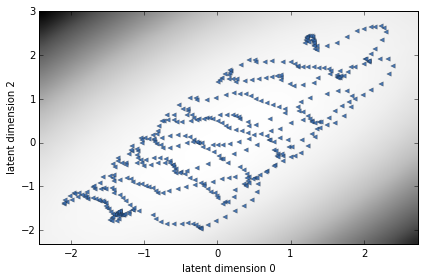

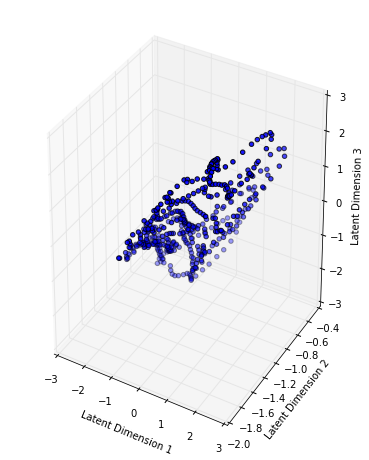

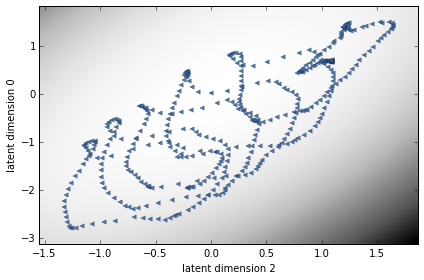

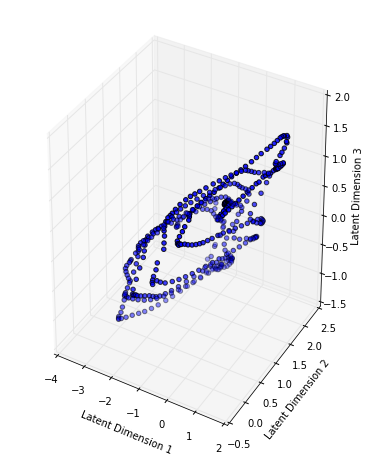

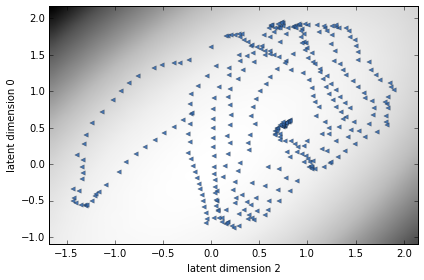

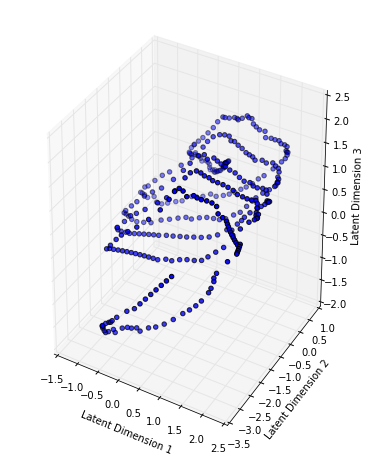

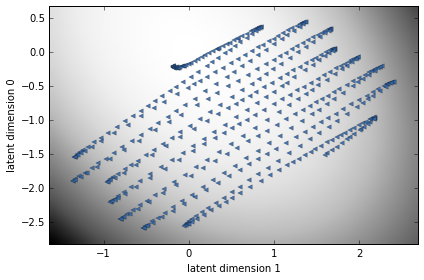

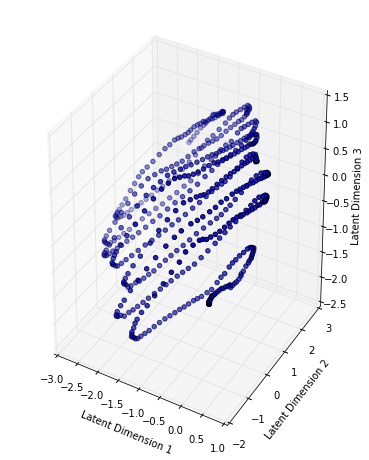

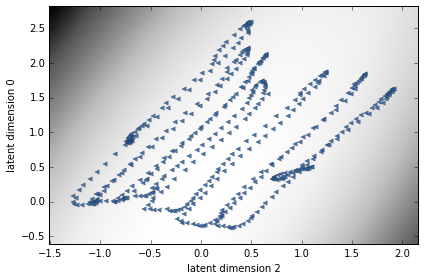

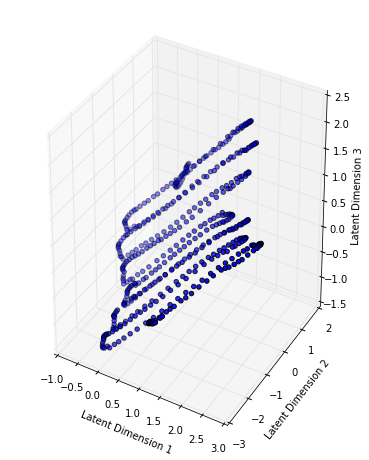

In [7]:
for k in range(len(ContD)):
    j = str(k)
    cont = NewContD['control' + j]
    T = np.linspace(0,len(cont)-1,len(cont))
    T = np.reshape(T,(len(T),1))
    dicto = {'cont': cont, 'Time': T}
    model = GPy.models.MRD(dicto, input_dim= input_dim, kernel=kern, num_inducing=25)
    model.optimize(messages = True)
    model.plot_latent() #2d projection
    my3dplot(model) 

<h5>Patients group</h5>

<h5>Without Dynamics</h5>

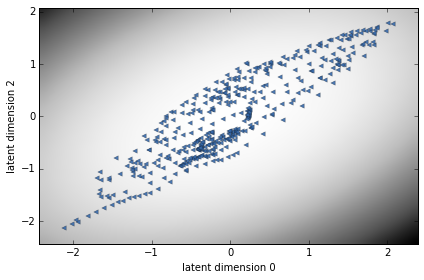

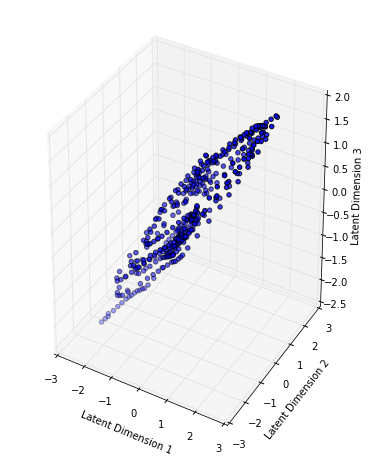

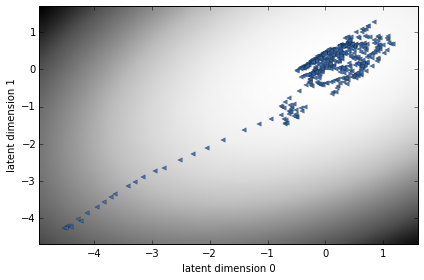

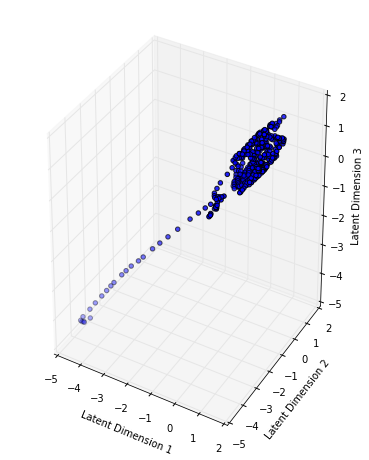

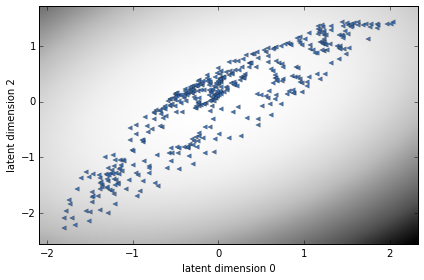

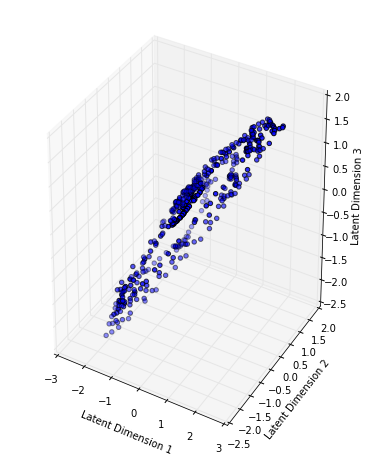

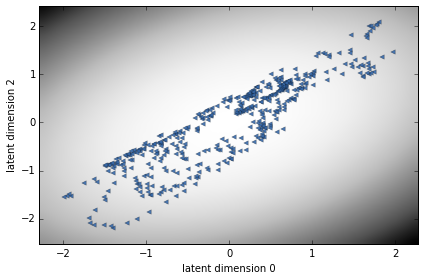

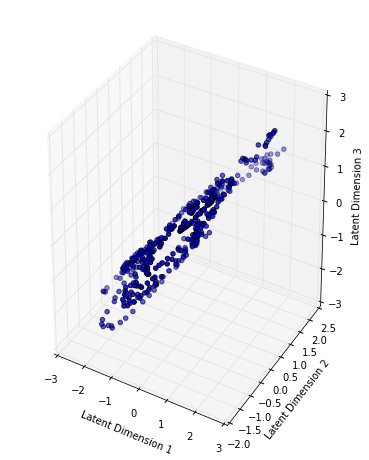

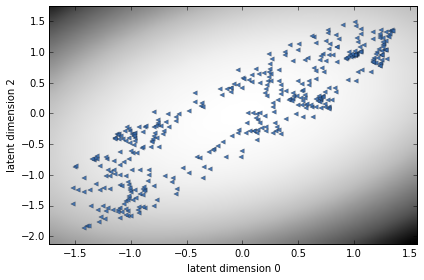

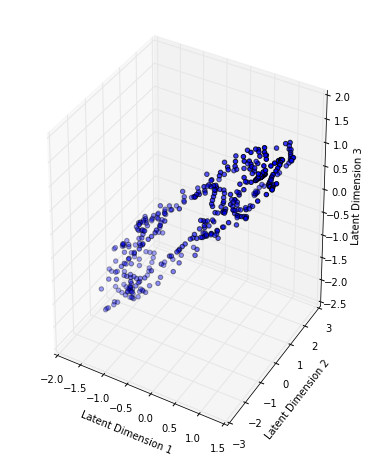

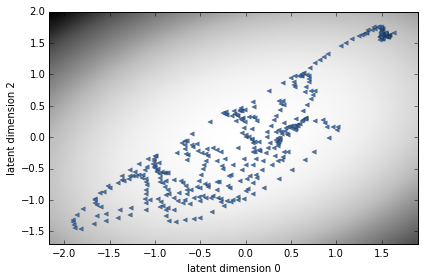

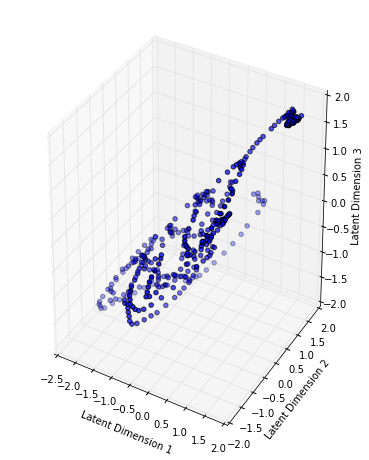

In [8]:
for k in range(6): #forced to the first 6 datasets len(PatD) should be used for the whole thing
    j = str(k)
    pat = NewPatD['patient' + j]
    model1 = GPy.models.BayesianGPLVM(pat, input_dim= input_dim, kernel=kern, num_inducing=25)
    model1.optimize(messages = True)
    model1.plot_latent() #2d projection
    my3dplot(model1)

<h5>With Dynamics</h5>

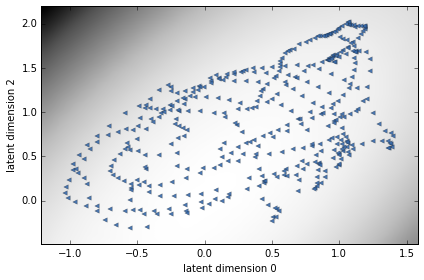

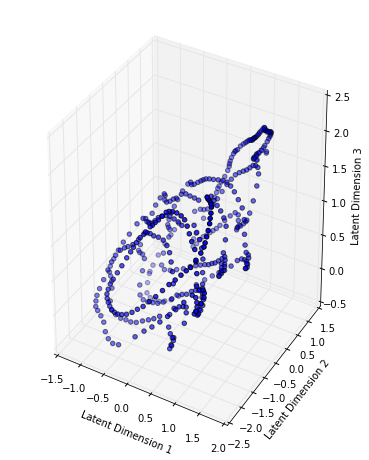

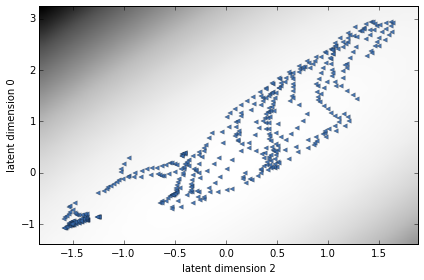

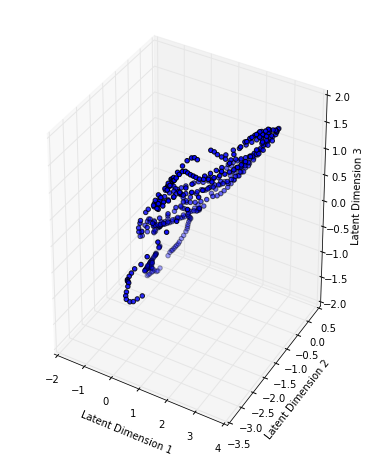

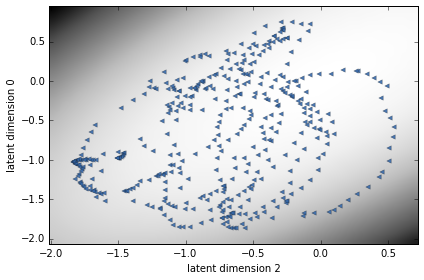

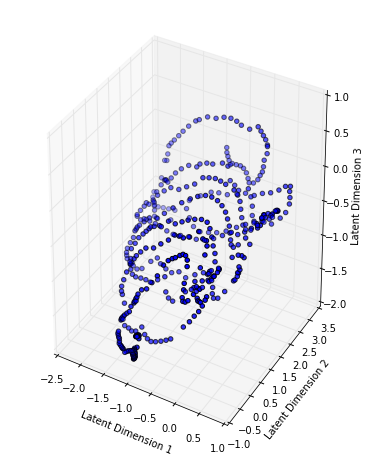

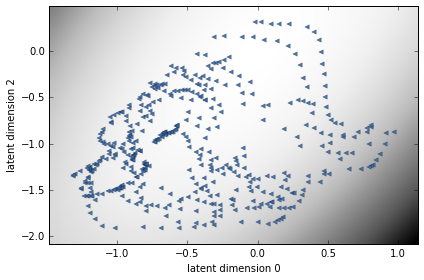

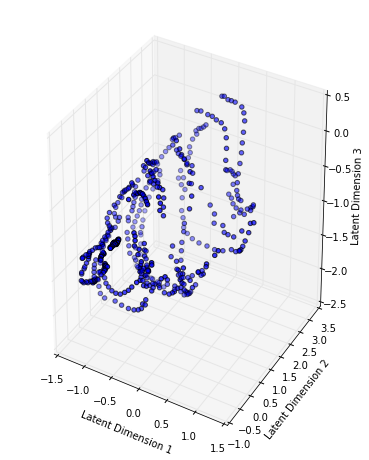

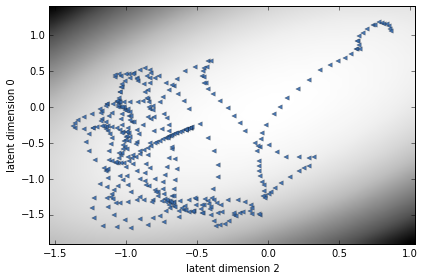

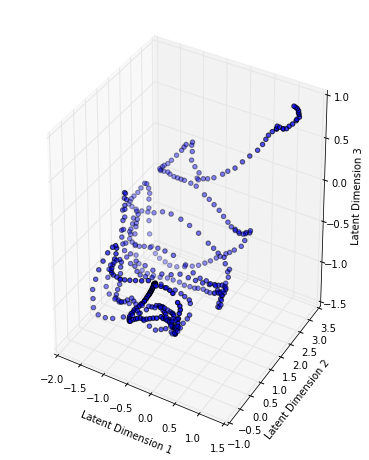

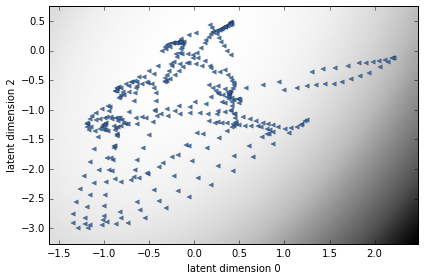

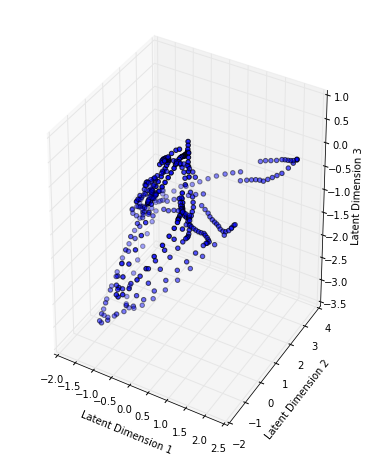

In [9]:
for k in range(6):#forced to 6 datasets
    j = str(k)
    pat = NewPatD['patient' + j]
    T = np.linspace(0,len(pat)-1,len(pat))
    T = np.reshape(T,(len(T),1))
    dicto = {'cont': pat, 'Time': T}
    model = GPy.models.MRD(dicto, input_dim= input_dim, kernel=kern, num_inducing=25)
    model.optimize(messages = True)
    model.plot_latent() #2d projection
    my3dplot(model)

<h4>Learning joint latent embedding for each class</h4>
<p></p>

<h5>Joint embedding for controls group</h5>

 /home/mawulolo/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 /home/mawulolo/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


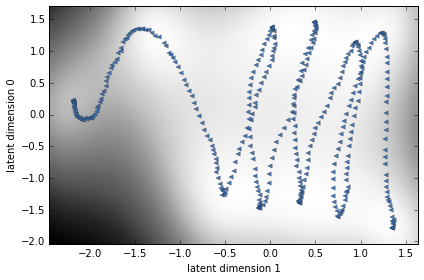

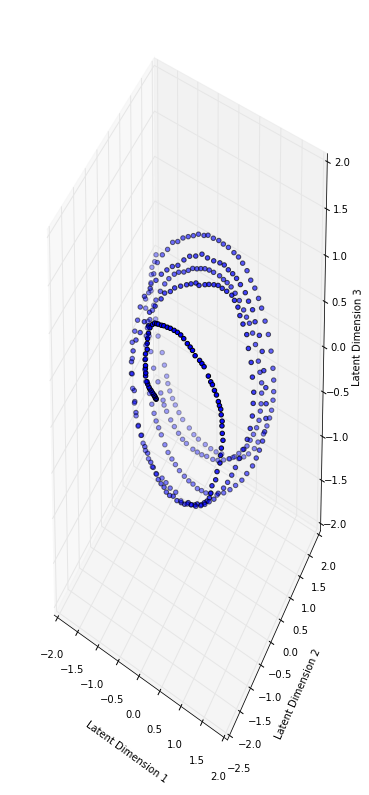

In [5]:
T = []
for i in range(len(ContD)):
    j = str(i)
    T.append(NewContD['control' + j].shape[0])
#print min(T)

NewContData = {}
for i in range(len(ContD)):
    j = str(i)
    NewContData['control' + j] = NewContD['control' + j][:min(T),:]
    
#MRD model implementation
input_dim = 3 # How many latent dimensions to use
kern = GPy.kern.RBF(input_dim, lengthscale=40) + GPy.kern.Linear(input_dim,ARD=True) + GPy.kern.White(input_dim) 

model1 = GPy.models.MRD(NewContData, input_dim, num_inducing=25)
model1.optimize(messages = True)

model1.plot_latent() #2d projection
my3dplot(model1)

<h5>With Dynamics</h5>

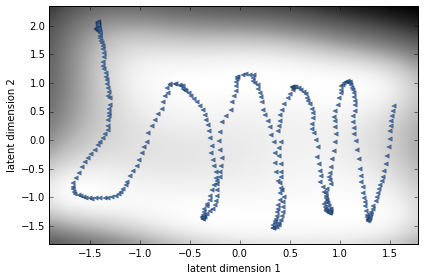

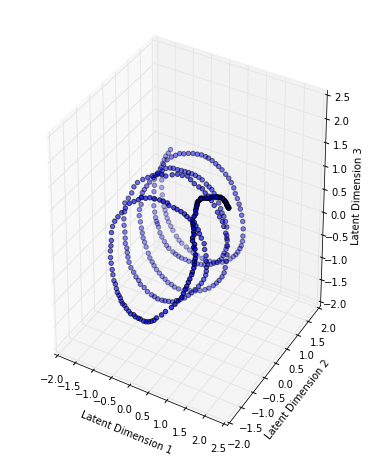

In [11]:
NewContData['Time'] = np.linspace(0,min(T)-1, min(T)).reshape((min(T),1))
#MRD model implementation
model1 = GPy.models.MRD(NewContData, input_dim, num_inducing=25)
model1.optimize(messages = True)

model1.plot_latent() #2d projection
my3dplot(model1)

<h5>Joint embedding for patients group</h5>

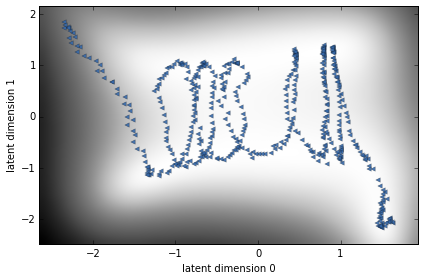

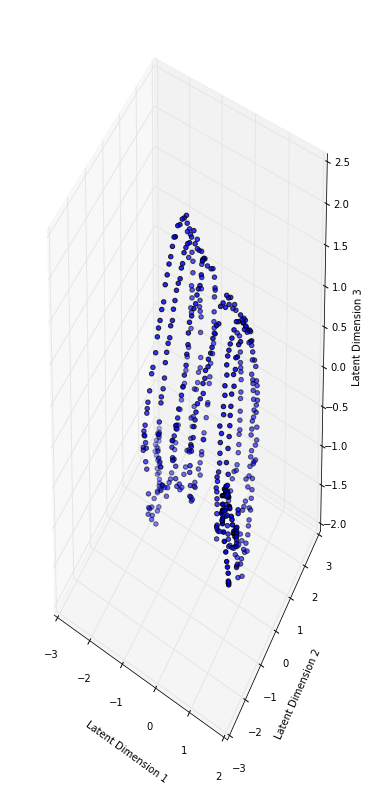

In [12]:
T = []
for i in range(6):#len(PatD)
    j = str(i)
    T.append(NewPatD['patient' + j].shape[0])
#print min(T)

NewPatData = {}
for i in range(6):#len(PatD)
    j = str(i)
    NewPatData['patient' + j] = NewPatD['patient' + j][:min(T),:]
    
model1 = GPy.models.MRD(NewPatData, input_dim, num_inducing=25)
model1.optimize(messages = True)

model1.plot_latent() #2d projection
my3dplot(model1)

<h5>With Dynamics</h5>

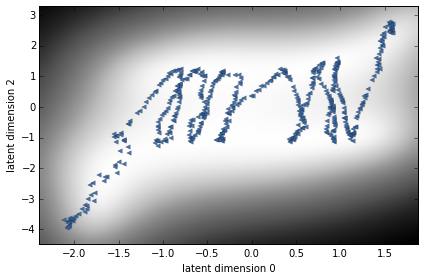

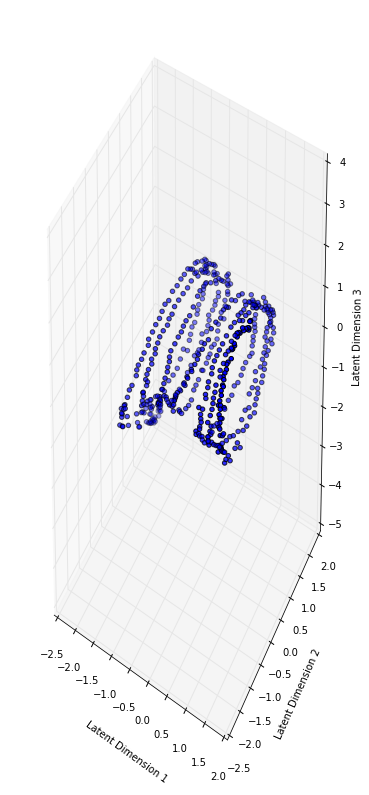

In [13]:
NewPatData['Time'] = np.linspace(0,min(T)-1, min(T)).reshape((min(T),1))
#MRD model implementation
model1 = GPy.models.MRD(NewPatData, input_dim, num_inducing=25)
model1.optimize(messages = True)

model1.plot_latent() #2d projection
my3dplot(model1)

<h4>Anomaly Detection</h4>
<p><p/>

<h5>In the controls sets</h5>

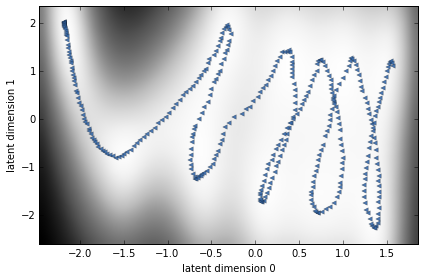

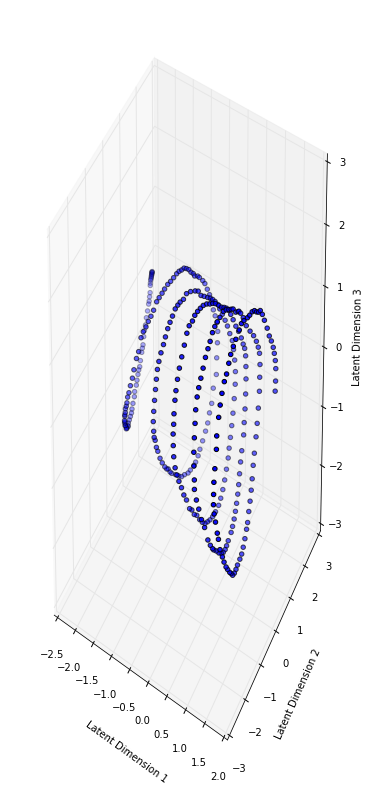

In [9]:
NewContD['control5'] = NewPatD['patient2'] 
T = []
for i in range(len(ContD)):
    j = str(i)
    T.append(NewContD['control' + j].shape[0])
#print min(T)

NewContData = {}
for i in range(len(ContD)):
    j = str(i)
    NewContData['control' + j] = NewContD['control' + j][:min(T),:]
    

#MRD model implementation
input_dim = 3 # How many latent dimensions to use
kern =  GPy.kern.RBF(input_dim, lengthscale=40) + GPy.kern.Linear(input_dim,ARD=True) + GPy.kern.White(input_dim)
model2 = GPy.models.MRD(NewContData, input_dim, num_inducing=25)
model2.optimize(messages = True)

model2.plot_latent() #2d projection
my3dplot(model2)

<h5>In the patients sets</h5>

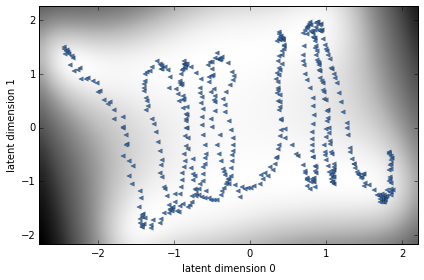

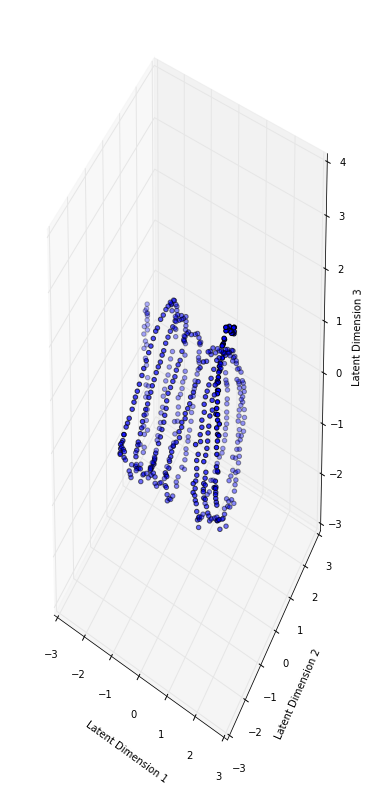

In [10]:
PatD['patient5'] = ContD['control1'] #Introducing control dataset into patients
#Preprocessing data
NewPatD = {}
for i in range(len(PatD)):
    j = str(i)
    Pat = pd.DataFrame(PatD['patient' + j]).T
    std_scale = preprocessing.StandardScaler().fit(cont)
    pat = std_scale.transform(cont)
    NewPatD['patient' + j] = pat

T = []
for i in range(6):#len(PatD)
    j = str(i)
    T.append(NewPatD['patient' + j].shape[0])
#print min(T)

NewPatData = {}
for i in range(6):#len(PatD)
    j = str(i)
    NewPatData['patient' + j] = NewPatD['patient' + j][:min(T),:]
    
    
    
#MRD model implementation
input_dim = 3 # How many latent dimensions to use
kern = GPy.kern.RBF(input_dim, lengthscale=40) + GPy.kern.Linear(input_dim,ARD=True) + GPy.kern.White(input_dim)
model2 = GPy.models.MRD(NewPatData, input_dim, num_inducing=25)
model2.optimize(messages = True)

model2.plot_latent() #2d projection
my3dplot(model2)

<h4>Classification</h4>
<p>
    <ul>
        <li>Using Manifold Relevance Determination model</li>
        <li>Using Nearest-Neighbor Algorithm</li>
    </ul>
</p>

<h5>Classification with MRD model</h5>

In [ ]:
#it's advisable to copy this code and run it directly in the terminal. 
#It requires an estimate of 16Gig RAM to completely run
#Even so it can take a couple of days to finish
import h5py #python library for working with HDF5 files
import pandas as pd  
import numpy as np
import GPy 
from matplotlib import pyplot as plt
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing 
import pandas as pd

def data_preprocess():    
    #Importing data
    F = h5py.File('data8MW.mat')

    #############################################
    #Extracting data
    NewPats=F['Patients'] #patients datasets
    PatD = {}
    for i in range(len(NewPats[0][:])):
        st = NewPats[0][i]
        j = str(i)
        PatD['patient' + j] = F[st][:]

    #Preprocessing data
    NewPatD = {}
    for i in range(len(PatD)):
        j = str(i)
        pat = pd.DataFrame(PatD['patient' + j]).T
        std_scale = preprocessing.StandardScaler().fit(pat)
        pat = std_scale.transform(pat)
        NewPatD['patient' + j] = pat


    #Extracting data
    NewConts=F['Controls'] #controls datasets
    ContD = {}
    for i in range(len(NewConts[0][:])):
        st = NewConts[0][i]
        j = str(i)
        ContD['control' + j] = F[st][:]

    #Preprocessing data
    NewContD = {}
    for i in range(len(ContD)):
        j = str(i)
        cont = pd.DataFrame(ContD['control' + j]).T
        std_scale = preprocessing.StandardScaler().fit(cont)
        cont = std_scale.transform(cont)
        NewContD['control' + j] = cont
    return NewPatD, NewContD
###############################################################
#MRD Classification procedure   
results = {}
for p in [2, 6, 12, 15, 30]:
    for c in [1,2,3,4,5,6]:
        NewPatD, NewContD = data_preprocess()
        NewPatDat = {}
        for i in range(p):
            j = str(i)
            NewPatDat['patient' + j] = NewPatD['patient' + j]

        NewContDat = {}
        for i in range(c):
            j = str(i)
            NewContDat['control' + j] = NewContD['control' + j]

        for i in NewContDat:
            del NewContD[i]

        for j in NewPatDat:
            del NewPatD[j]
        #Extracting values in the NewContDat and NewPatDat dictionaries
        Yes = [(v) for v in NewContDat.itervalues()]
        No =  [(v) for v in NewPatDat.itervalues()]
        Y = np.vstack(tuple(Yes) + tuple(No))
        ContLab, ContT = [] , []
        for i in NewContDat:
            n = len(NewContDat[i])
            L = np.zeros((n,1))
            L[:] = 1.
            ContLab.append(L)
            t = np.linspace(0,n-1,n).reshape((n,1))
            ContT.append(t)

        PatLab ,PatT = [], []
        for i in NewPatDat:
            n = len(NewPatDat[i])
            L = np.zeros((n,1))
            L[:] = -1.
            PatLab.append(L)
            t = np.linspace(0,n-1,n).reshape((n,1))
            PatT.append(t)

        L = tuple(ContLab) + tuple(PatLab)
        L = np.vstack(L)
        T = tuple(ContT) + tuple(PatT)
        T = np.vstack(T)

        dicto = {'Design': Y, 'Label': L, 'Time': T}#, 'Time': T

        #MRD model implementation
        input_dim = 7 # How many latent dimensions to use
        kern =  GPy.kern.RBF(input_dim, lengthscale=90, ARD = True) + GPy.kern.Linear(input_dim) + GPy.kern.White(input_dim)
        model = GPy.models.MRD(dicto, input_dim, num_inducing=70)
        model.optimize(messages = True, max_iters = 500)

        mean_pred, median_pred = [] , []
        for i in NewPatD:
            X_tmp = model.bgplvms[1].infer_newX(NewPatD[i])[0]
            a,b = model.bgplvms[2].predict(X_tmp)
            (median, mean_a, mean_b) = np.median(a), np.mean(a), np.mean(b)
            mean_pred.append(mean_a)
            median_pred.append(median)

        mean_pred1, median_pred1  = [], []
        for i in NewContD:
            X_tmp = model.bgplvms[1].infer_newX(NewContD[i])[0]
            a,b = model.bgplvms[2].predict(X_tmp)
            (median, mean_a, mean_b) = np.median(a), np.mean(a), np.mean(b)
            mean_pred1.append(mean_a)
            median_pred1.append(median)
        mean_ac = (len([i for i in mean_pred if i < 0]) + len([i for i in mean_pred1 if i>0]))/ float(len(mean_pred) + len(mean_pred1))
        median_ac = (len([i for i in median_pred if i < 0]) + len([i for i in median_pred1 if i > 0]))/ float(len(median_pred) + len(median_pred1))
        print (mean_ac, median_ac)
        results['patients ' + str(p) + '--' + 'controls ' + str(c)] = (mean_ac, median_ac)
results

<h5>Classification with K-NN</h5>

In [ ]:
import h5py #python library for working with HDF5 files
import pandas as pd  
import numpy as np
import GPy 
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier

def data_preprocess():    
    #Importing data
    F = h5py.File('data8MW.mat')

    #############################################
    #Extracting data
    NewPats=F['Patients'] #patients datasets
    PatD = {}
    for i in range(len(NewPats[0][:])):
        st = NewPats[0][i]
        j = str(i)
        PatD['patient' + j] = F[st][:]

    #Preprocessing data
    NewPatD = {}
    for i in range(len(PatD)):
        j = str(i)
        pat = pd.DataFrame(PatD['patient' + j]).T
        std_scale = preprocessing.StandardScaler().fit(pat)
        pat = std_scale.transform(pat)
        NewPatD['patient' + j] = pat


    #Extracting data
    NewConts=F['Controls'] #controls datasets
    ContD = {}
    for i in range(len(NewConts[0][:])):
        st = NewConts[0][i]
        j = str(i)
        ContD['control' + j] = F[st][:]

    #Preprocessing data
    NewContD = {}
    for i in range(len(ContD)):
        j = str(i)
        cont = pd.DataFrame(ContD['control' + j]).T
        std_scale = preprocessing.StandardScaler().fit(cont)
        cont = std_scale.transform(cont)
        NewContD['control' + j] = cont
    return NewPatD, NewContD
###############################################################
#KNN classification procedure   
results = {}
for p in [2, 6, 12, 15, 30]: 
    for c in [1,2,3,4,5,6]:
        NewPatD, NewContD = data_preprocess()
        NewPatDat = {}
        for i in range(p):
            j = str(i)
            NewPatDat['patient' + j] = NewPatD['patient' + j]

        NewContDat = {}
        for i in range(c):
            j = str(i)
            NewContDat['control' + j] = NewContD['control' + j]

        for i in NewContDat:
            del NewContD[i]

        for j in NewPatDat:
            del NewPatD[j]
        #Extracting values in the NewContDat and NewPatDat dictionaries
        Yes = [(v) for v in NewContDat.itervalues()]
        No =  [(v) for v in NewPatDat.itervalues()]
        Y = np.vstack(tuple(Yes) + tuple(No))
        ContLab = [] 
        for i in NewContDat:
            n = len(NewContDat[i])
            L = np.zeros((n,1))
            L[:] = 1.
            ContLab.append(L)

        PatLab = []
        for i in NewPatDat:
            n = len(NewPatDat[i])
            L = np.zeros((n,1))
            L[:] = -1.
            PatLab.append(L)

        L = tuple(ContLab) + tuple(PatLab)
        L = np.vstack(L)

        neigh = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
        neigh.fit(Y, L)

        mean_pred = [] 
        for i in NewPatD:
            pred = neigh.predict(NewPatD[i])
            mean_pred.append(np.mean(pred))

        mean_pred1 = []
        for i in NewContD:
            pred = neigh.predict(NewContD[i])
            mean_pred1.append(np.mean(pred))

        mean_ac = (len([i for i in mean_pred if i < 0]) + len([i for i in mean_pred1 if i>0]))/ float(len(mean_pred) + len(mean_pred1))

        print mean_ac
        results['patients ' + str(p) + '--' + 'controls ' + str(c)] = mean_ac

results

<h5>Plotting results</h5>

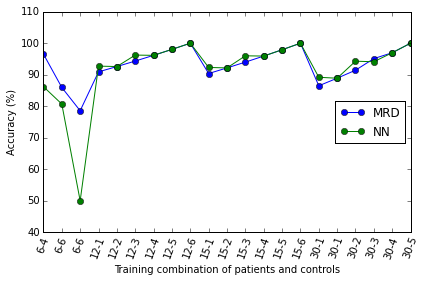

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# data to plot
n_groups = 21
#classification results
MRD = ( 96.55, 85.96, 78.57, 90.91, 92.59, 94.34, 96.15, 98.04, 100,  90.38, 92.16, 94.00, 95.92, 97.92, 
       100, 86.49, 88.89, 91.43, 95.12, 96.97, 100)
NN = (86.21, 80.70, 50, 92.73, 92.59, 96.23, 96.15, 98.04, 100, 92.31, 92.16, 96.00, 95.92, 97.92, 100, 
      89.19, 88.89, 94.29, 94.12, 96.97, 100)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.65
 
rects1 = plt.plot(index, MRD, '-o',label='MRD')
rects2 = plt.plot(index, NN, '-o',label='NN')
 
plt.xlabel('Training combination of patients and controls')
plt.ylabel('Accuracy (%)')
plt.yticks(np.arange(40, 120, 10))
plt.xticks(index, ('6-4', '6-6', '6-6', '12-1','12-2', '12-3', '12-4', '12-5', '12-6', '15-1', '15-2', '15-3', 
                   '15-4', '15-5', '15-6', '30-1', '30-1', '30-2', '30-3', '30-4', '30-5', '30-6'), rotation=70)
plt.legend(loc = 5)

plt.tight_layout()
#plt.show()

**I made a few assumptions**
* The set treshold for our binary classification is 0 since the labels were 1 amd -1
* For each dataset, we compared the average over predicted time label to the treshold for deciding class label (e.i, if average < 0 then label is -1 (patient) and vice-versa)
